In [1]:
#We will be performing
#Basic EDA operations
#Feature Engineering
#will apply various ML algorithms with best predictions

In [2]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
## lets import the dataset
dataset = pd.read_csv("C:/Users/91952/OneDrive/Documents/Concrete Compressive Strength.csv")

In [4]:
dataset.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
## shape of dataset
dataset.shape

(1030, 9)

In [6]:
## Lets check the missing values
dataset.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age (day)                        0
Concrete compressive strength    0
dtype: int64

Conclusion - No missing values in the datasets as seen

In [7]:
# lets work on Numerical values

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age (day)                      1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
# lets check how many unique values each features have in int
for feature in dataset.columns:
    print(feature,":",len(dataset[feature].unique()))

Cement : 280
Blast Furnace Slag : 187
Fly Ash : 163
Water : 205
Superplasticizer : 155
Coarse Aggregate : 284
Fine Aggregate : 304
Age (day) : 14
Concrete compressive strength : 938


we see there is less unique values in age as compare to others so we can consider age as a discrete variable and the other variables as continues variables. 

In [9]:
# so lets create list of discrete feature and plot the graphs
discreate_feature = [feature for feature in dataset.columns if feature == "Age (day)"]

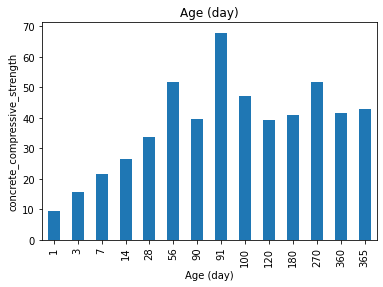

In [10]:
data = dataset.copy()
for feature in discreate_feature:
    data.groupby(feature)['Concrete compressive strength'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("concrete_compressive_strength")
    plt.title(feature)
    plt.show()

In [11]:
# now lets create the list of continous variable
continuous_feature = [feature for feature in dataset.columns if feature not in discreate_feature]

In [12]:
continuous_feature

['Cement',
 'Blast Furnace Slag',
 'Fly Ash',
 'Water',
 'Superplasticizer',
 'Coarse Aggregate',
 'Fine Aggregate',
 'Concrete compressive strength']

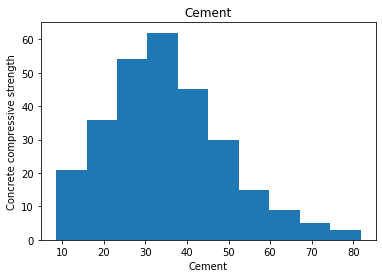

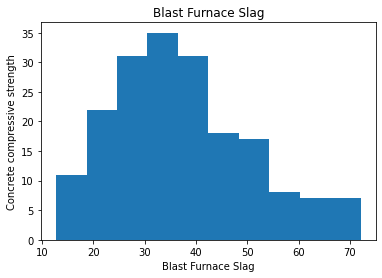

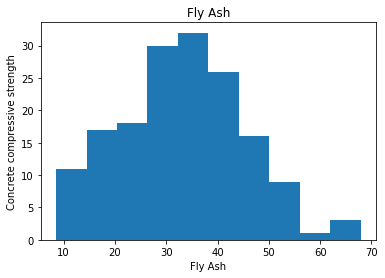

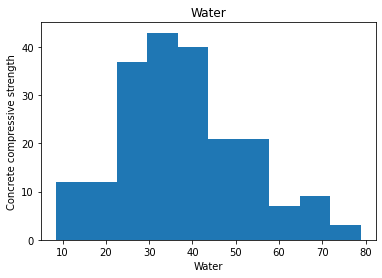

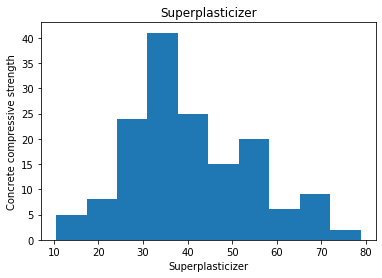

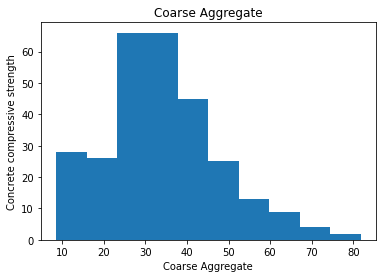

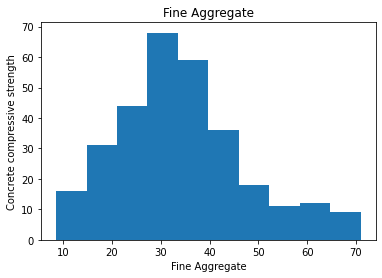

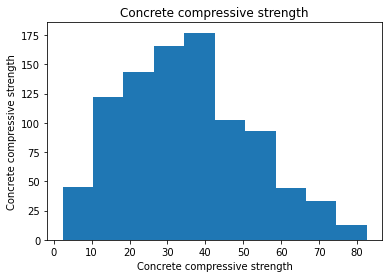

In [13]:
## lets find realtionship between continuous feature and concrete_compressive_strength
data = dataset.copy()
for feature in continuous_feature:
    data.groupby(feature)['Concrete compressive strength'].median().plot.hist()
    plt.xlabel(feature)
    plt.ylabel("Concrete compressive strength")
    plt.title(feature)
    plt.show()

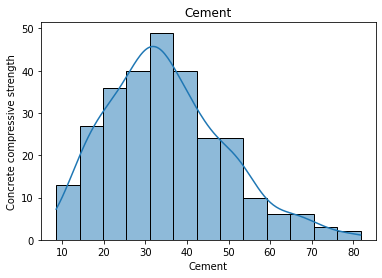

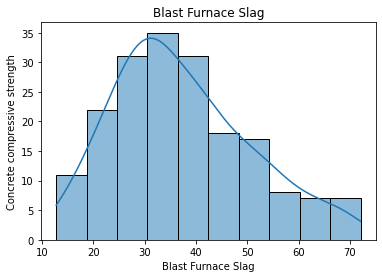

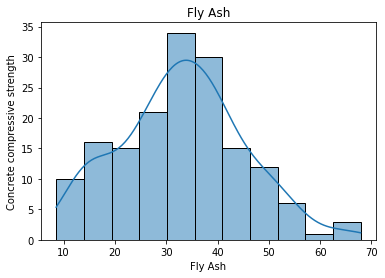

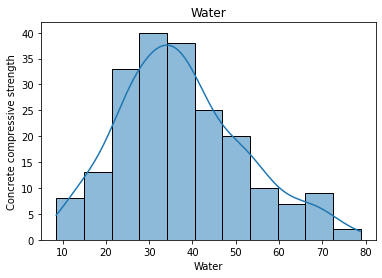

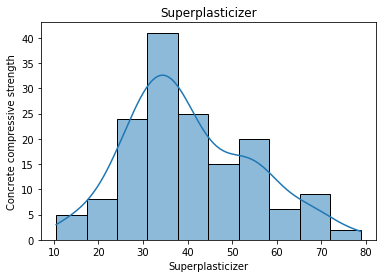

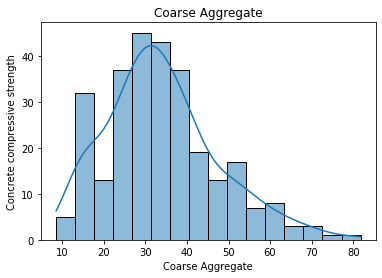

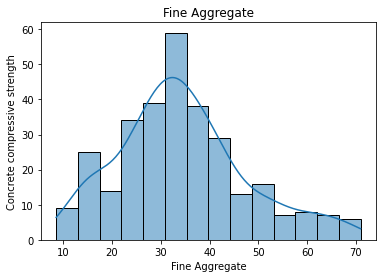

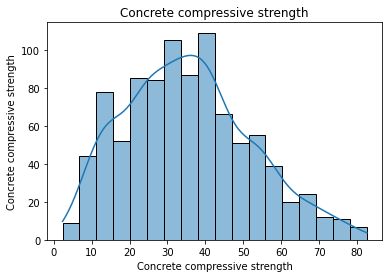

In [14]:
## lets try to implement kde in graphs for better visualizations
data = dataset.copy()
for feature in continuous_feature:
    a = data.groupby(feature)["Concrete compressive strength"].median()
    sns.histplot(data = a, kde=True)
    plt.xlabel(feature)
    plt.ylabel("Concrete compressive strength")
    plt.title(feature)
    plt.show()

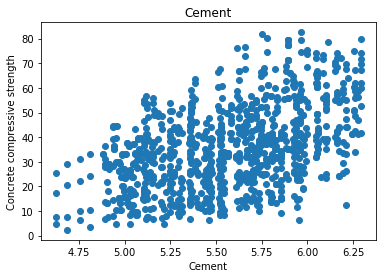

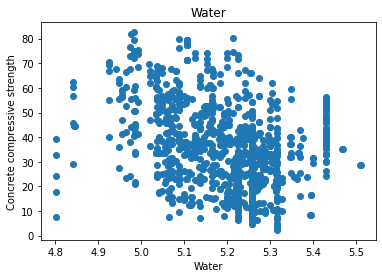

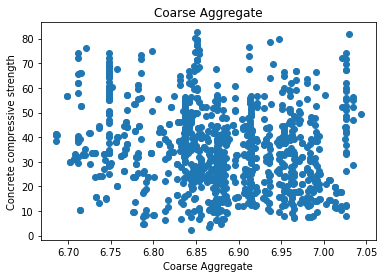

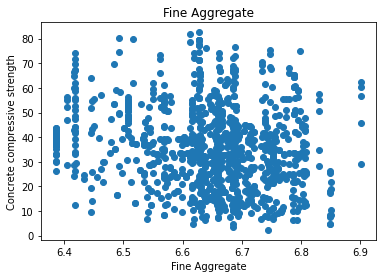

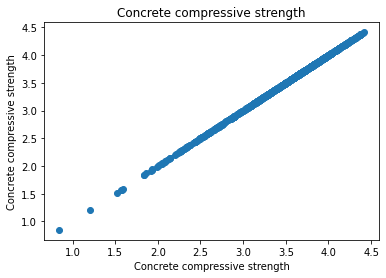

In [15]:
# using logarithmic for better understanding of the data

data = dataset.copy()
for feature in continuous_feature:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] =np.log(data[feature])
        plt.scatter(data[feature],data["Concrete compressive strength"])
        plt.xlabel(feature)
        plt.ylabel("Concrete compressive strength")
        plt.title(feature)
        plt.show()

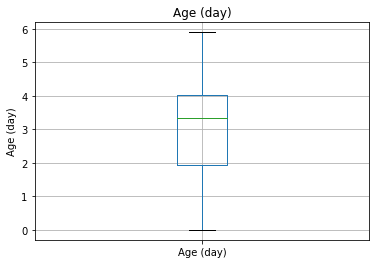

In [16]:
## lets see outliers in discrete variables
data = dataset.copy()
for feature in discreate_feature:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.title(feature)
        plt.ylabel(feature)
        plt.show()

No outliers in age

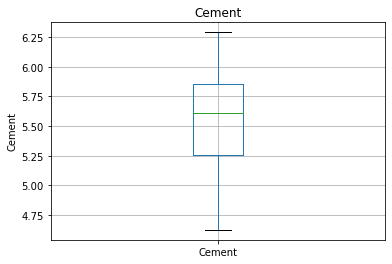

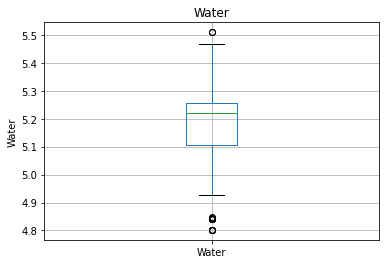

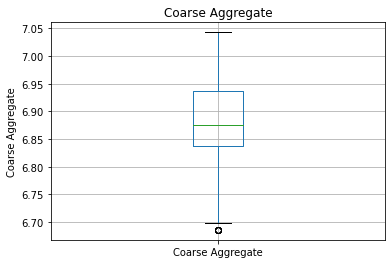

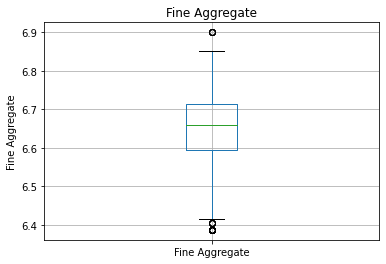

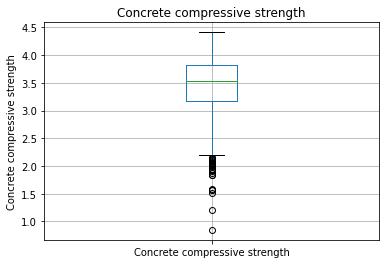

In [17]:
## lets see outliers in continuous variables
data = dataset.copy()
for feature in continuous_feature:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.title(feature)
        plt.ylabel(feature)
        plt.show()

we see some outliers in some of the variables

##### Feature Engineering

In [18]:
## no null values so continuing with the train test split 
dataset.shape

(1030, 9)

In [19]:
dataset.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [20]:
X = dataset.iloc[:,0:8]
y = dataset.iloc[:,-1]

In [21]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [22]:
y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: Concrete compressive strength, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [24]:
## Now applying different regression techniques to find the best accuracy

##### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [26]:
linear_predict = linear.predict(X_test)

In [27]:
from sklearn.metrics import r2_score
linear_score = r2_score(y_test,linear_predict)
print("Accuracy score for linear Regression: ", linear_score*100)

Accuracy score for linear Regression:  62.854402543086806


##### Ridge Regression

In [28]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [29]:
ridge_predict = ridge.predict(X_test)

In [30]:
ridge_score = r2_score(y_test,ridge_predict)
print("Accuracy score for Ridge Regression:",ridge_score*100)

Accuracy score for Ridge Regression: 62.854421025987236


###### Lasso Regression

In [31]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [32]:
lasso_predict = lasso.predict(X_test)

In [33]:
lasso_score = r2_score(y_test,lasso_predict)
print("Accuracy score for Lasso regression:",lasso_score*100)

Accuracy score for Lasso regression: 62.88390274627654


###### Elastic Net

In [34]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train,y_train)

ElasticNet()

In [35]:
elastic_predict = elastic.predict(X_test)

In [36]:
elastic_score = r2_score(y_test,elastic_predict)
print("Accuracy score for Elastic Net Regression:",elastic_score*100)

Accuracy score for Elastic Net Regression: 62.8775570693138


##### KNN Regressor

In [37]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [38]:
knn_predict = knn.predict(X_test)

In [39]:
knn_score = r2_score(y_test,knn_predict)
print("Accuracy Score for KNN:",knn_score*100)

Accuracy Score for KNN: 67.30170126554962


##### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [41]:
dt_predict = dt.predict(X_test)

In [42]:
dt_score = r2_score(y_test,dt_predict)
print("Accuracy score for Decision Tree:",dt_score*100)

Accuracy score for Decision Tree: 81.66922615806558


##### Support Vector Regressor

In [43]:
from sklearn.svm import SVR
svr =SVR()
svr.fit(X_train,y_train)

SVR()

In [44]:
svr_predict = svr.predict(X_test)

In [45]:
svr_score = r2_score(y_test,svr_predict)
print("Accuracy score for SVR:",svr_score*100)

Accuracy score for SVR: 24.65148745706025


##### Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [47]:
rf_predict = rf.predict(X_test)

In [48]:
rf_score = r2_score(y_test,rf_predict)
print("Accuracy score for random forest:",rf_score*100)

Accuracy score for random forest: 93.31635618689509


##### Extra Tree Regressor

In [49]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(X_train,y_train)

ExtraTreesRegressor()

In [50]:
et_predict = et.predict(X_test)

In [51]:
et_score = r2_score(y_test,et_predict)
print("Accuracy score for Extra Tree regressor:",et_score*100)

Accuracy score for Extra Tree regressor: 92.98698996985493


##### Adaboost Regressor

In [52]:
from sklearn.ensemble import AdaBoostRegressor
ad = AdaBoostRegressor()
ad.fit(X_train,y_train)

AdaBoostRegressor()

In [53]:
ad_preedict = ad.predict(X_test)

In [54]:
ad_score = r2_score(y_test,ad_preedict)
print("Accuracy score for Adaboost Regressor:", ad_score*100)

Accuracy score for Adaboost Regressor: 78.22474959377166


##### Gradient Boost Regressor

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
gd = GradientBoostingRegressor()
gd.fit(X_train,y_train)

GradientBoostingRegressor()

In [56]:
gd_predict = gd.predict(X_test)

In [57]:
gd_score = r2_score(y_test,gd_predict)
print("Accuracy score Gradient Boost Regressor:",gd_score*100)

Accuracy score Gradient Boost Regressor: 90.73751641536218


##### We got high Accuracy on Extra tree Regressor

####  Lets download the model

In [58]:
import pickle

In [63]:
modelname = "Concrete_compressive_strength"
pickle.dump(et,open(modelname,'wb'))

In [66]:
loaded_model = pickle.load(open(modelname,'rb'))
loaded_model.predict(X_test)

array([45.20564168, 37.1638113 , 10.59734955, 38.72645349, 71.29871316,
       25.02108404, 30.30433868, 25.99621684, 51.56949532, 27.02727304,
       79.29663476, 14.34554792, 40.75266488, 79.26429834, 50.42064904,
       17.92858232, 33.51011939, 24.9537636 , 30.21394148, 61.93699523,
       29.64963887, 50.8875346 , 34.89504226, 51.70497538, 32.71568446,
       47.59852035, 22.42898523, 11.31961013, 25.58948805, 65.19685056,
       36.28403992,  6.22656812, 29.10228554, 21.87540889, 45.82598097,
       42.4118475 , 46.36938459, 37.72871573, 13.65121111, 39.99884698,
       12.21421902, 33.18150824, 44.03608059, 35.77304857, 41.51598376,
       32.88672474, 11.42533438, 19.60332642, 61.66776076, 61.33001306,
       28.97373274, 16.1937435 , 33.39821744, 40.71183411, 51.04928567,
       22.69003463, 38.30877583, 48.97961662, 68.87749408, 44.29531667,
       30.46150473, 51.63323048, 15.3334705 , 35.18873145, 25.93712875,
       37.19366462, 37.1638113 , 34.87273081, 53.00077854, 38.40